In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('results_phase0.csv', index_col=False)
df.head(5)

,ID,Title,Authors,Journal,Year,Source
0,1,visibility graph analysis of speech evoked aud...,"mozaffarilegha m., adeli h.",neuroscience letters,2019,scopus
1,2,revisiting the “paradox of stereotaxic surgery...,"magnusson j.l., leventhal d.k.",frontiers in systems neuroscience,2021,scopus
2,3,"mapping autonomic, mood and cognitive effects ...","neudorfer c., elias g.j.b., jakobs m., boutet ...",brain,2021,scopus
3,4,going deep into schizophrenia with artificial ...,"cortes-briones j.a., tapia-rivas n.i., d'souza...",schizophrenia research,2021,scopus
4,5,an introduction to cognitive psychology: proce...,"groome d., brace n., edgar g., edgar h., eysen...",an introduction to cognitive psychology: proce...,2021,scopus


In [3]:
df.shape

(2488, 6)

### Phase A) Perform Queries for Inclusion and Exclusion criteria.

1) The Query contains keywords: *EEG* AND
(abnormal\* OR patholog\* OR classif\* OR detect\* OR decod\* OR network\* OR \*learning)

2) The Query contains keywords:
(abnormal\* OR patholog\*)

In [4]:
def Q(word):return df.Title.str.contains(word)==True

In [5]:
# Include/Exclude Queries
I1 = (Q('eeg')&(Q('class')|Q('decod')|Q('detect')|Q('neural')|Q('learning')))
I2 = (Q('abnormal')|Q('patholog'))
E13 = (Q('ecg')|Q('emg')|Q('mri')|Q('pcg')|Q('multi-class')|Q('multi-label')|\
       Q('real-time')|Q('seizure')|Q('bci')|Q('behavior')|Q('motor'))

dfA = pd.concat([df[I1],df[I2]]).drop_duplicates()
dfB = dfA[~E13]
print('Documents after A1-2: ',len(dfA))
print('Documents after B1-4: ',len(dfB))

Documents after A1-2:  503
Documents after B1-4:  370


In [6]:
dfB.to_csv('results_phase1.csv', index=False)

### Phase B) Assess eligibility of documents

we assessed the eligibility of the documents by read their titles and scanning their abstracts (Note: the abstract has not been added to the dataframe to reduce the size) 

In [7]:
df= pd.read_csv('results_phase1.csv', index_col=False)
df

,ID,Title,Authors,Journal,Year,Source
0,11,a novel computer-aided diagnosis framework for...,"muhammad tariq sadiq, hesam akbari, siuly siul...","computers in biology and medicine,",2021,sciencedirect
1,42,eeg-convtransformer for single-trial eeg based...,"subhranil bagchi, deepti r. bathula",preprints,2021,arxiv
2,49,deep learning-based classification of fine han...,"bressan g., cisotto g., müller-putz g.r., wrie...",future internet,2021,scopus
3,57,automated eeg pathology detection based on dif...,"bajpai r., yuvaraj r., prince a.a.",computers in biology and medicine,2021,scopus
4,59,bendr: using transformers and a contrastive se...,"kostas d., aroca-ouellette s., rudzicz f.",frontiers in human neuroscience,2021,scopus
...,...,...,...,...,...,...
365,2291,hybrid fuzzy integrated convolutional neural n...,"yue x., wang j., huang w.",neurocomputing,2020,scopus
366,2306,reduced features set neural network approach b...,"shafi i., aziz a., din s., ashraf i.",computers in biology and medicine,2022,scopus
367,2340,computer aided hierarchal lesion classificatio...,"bhardwaj c., jain s., sood m.",international journal of recent technology and...,2019,scopus
368,2400,automated detection of kidney abnormalities us...,"wu y., yi z.",knowledge-based systems,2020,scopus


In [8]:
import numpy as np
np.unique(df.Year)

array([2012, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

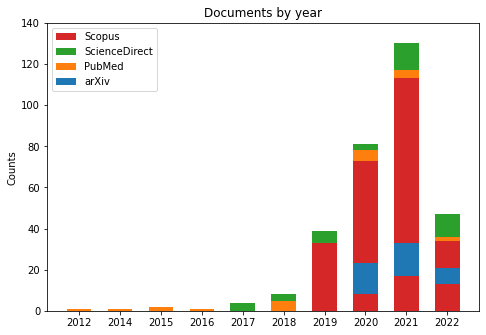

In [9]:
import matplotlib.pyplot as plt

scopus, science, pubmed, arxiv = [],[],[],[]

for i in np.unique(df.Year):
    scopus.append(df[(df.Year==i)&(df.Source=='scopus')].shape[0])
    science.append(df[(df.Year==i)&(df.Source=='sciencedirect')].shape[0])
    pubmed.append(df[(df.Year==i)&(df.Source=='pubmed')].shape[0])
    arxiv.append(df[(df.Year==i)&(df.Source=='arxiv')].shape[0])
    
width = 0.60
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ind = np.arange(len(np.unique(df.Year))) 
ax.bar(ind, scopus, width, color='tab:red')
ax.bar(ind, science, width,bottom=scopus, color='tab:green')
ax.bar(ind, pubmed, width,bottom=scopus, color='tab:orange')
ax.bar(ind, arxiv, width, bottom=science, color='tab:blue')
ax.set_ylabel('Counts')
ax.set_title('Documents by year')
ax.set_xticks(ind,('2012','2014','2015','2016','2017', '2018', '2019', '2020', '2021', '2022'))
ax.set_yticks(np.arange(0, 150, 20))
ax.legend(labels=['Scopus', 'ScienceDirect','PubMed','arXiv'])
plt.show()

<img src="wordcloud.png"/>

In [10]:
df['Schizophrenia']=Q('schizophrenia')
df['Epilepsy']=Q('epilep')
df['Parkison']=Q('parkison')
df['Alzheimer']=Q('alzheimer')
df['Parkison']=Q('parki')
df['Autism']=Q('autism')
df['Depression']=Q('depression')
df['Alcohol']=Q('alcohol')
df['Heart']=(Q('heart')|Q('stroke')|Q('cardiac'))
df['Emotion']=Q('emotion')
df['Sleep']=Q('sleep')
df['Cognitive']=Q('cog')

df['Pathology']=Q('pathol')
df['Abnormal']=Q('abnormal')
df['EegClassification']=(Q('eeg')&Q('classification'))        
df['DeepLearning']=(Q('deep')&Q('learning'))
df['MachineLearning']=(Q('machine')&Q('learning'))

df['CNN']=(Q('convolutional')&Q('neural')&Q('network'))
df['AL']=(Q('adversarial')&Q('learning'))
df['LSTM']=((Q('long')&Q('short')&Q('network'))|Q('lstm'))
df['RNN']=((Q('recurrent')&Q('network'))|Q('rnn'))
df['NN']=(Q('neural')&Q('network'))
df['GB']=(Q('gradient')|Q('boost'))
df['SVM']=Q('svm')
df['KNN']=Q('knn')
df['LR']=Q('logistic')
df['Rieman']=Q('rieman')
df['RF']=(Q('random forest')|Q('decision tree'))

df['Wavelet']=(Q('wavelet')|Q('cwt')|Q('dwt'))
df['Fourier']=(Q('fourier')|Q('fft'))
df['Entropy']=Q('entrop')
df['Connectivity']=Q('connectivity')

In [11]:
df.sum()

ID                                                              455578
Title                a novel computer-aided diagnosis framework for...
Authors              muhammad tariq sadiq, hesam akbari, siuly siul...
Journal              computers in biology and medicine,preprintsfut...
Year                                                            747555
Source               sciencedirectarxivscopusscopusscopusscopusscie...
Schizophrenia                                                       30
Epilepsy                                                            43
Parkison                                                            11
Alzheimer                                                            7
Autism                                                               7
Depression                                                           9
Alcohol                                                              4
Heart                                                               15
Emotio

### Phase C) Scanning titles and abstracts

1) Studies that classify/decode/identify any abnormal/pathological task

2) Studies that that focus on binary classification

3) Final judgement

In [12]:
df = pd.read_excel('results_phase2.xlsx', index_col=False)
df[df['final']==1.0].to_csv('results_phase3.csv', index=False)

### Phase D) Full text reading

In [13]:
df = pd.read_csv('results_phase3.csv', index_col=False)
df

,ID,Title,Authors,Journal,Year,Source,pathology,binary_class,final
0,57,automated eeg pathology detection based on dif...,"bajpai r., yuvaraj r., prince a.a.",computers in biology and medicine,2021,scopus,1.0,1.0,1.0
1,128,domain adaptation for epileptic eeg classifica...,"peizhen peng, liping xie, kanjian zhang, jinxi...","biomedical signal processing and control,",2022,sciencedirect,1.0,1.0,1.0
2,146,supervised network-based fuzzy learning of eeg...,"yu h., lei x., song z., liu c., wang j.",ieee transactions on fuzzy systems,2020,scopus,1.0,1.0,1.0
3,396,machine-learning-based diagnostics of eeg path...,"gemein l.a.w., schirrmeister r.t., chrabąszcz ...",neuroimage,2020,scopus,1.0,1.0,1.0
4,561,deep learning enabled automatic abnormal eeg i...,"subhrajit roy, isabell kiral-kornek, and stefa...",-,2018,sciencedirect,1.0,1.0,1.0
5,609,automatic detection of abnormal eeg signals us...,"albaqami h., hassan g.m., subasi a., datta a.",biomedical signal processing and control,2021,scopus,1.0,1.0,1.0
6,670,drowsiness detection based on eeg signal using...,"ekaputri c., fu’adah y.n., pratiwi n.k.c., riz...",lecture notes in electrical engineering,2021,scopus,1.0,1.0,1.0
7,677,automated detection of abnormal eeg signals us...,"sharma m., patel s., acharya u.r.",pattern recognition letters,2020,scopus,1.0,1.0,1.0
8,753,a semi-supervised deep learning algorithm for ...,"subhrajit roy, kiran kate, and martin hirzel",-,2019,sciencedirect,1.0,1.0,1.0
9,800,detection of epileptic dysfunctions in eeg sig...,"ali yener mutlu,","biomedical signal processing and control,",2018,sciencedirect,1.0,1.0,1.0


In [14]:
df.shape

(33, 9)